In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from scipy.stats import ttest_ind



In [11]:
from pathlib import Path

csv_path = Path.cwd() / 'df_emotions_1.csv'
csv_path2 = Path.cwd() / 'df_emotions_2.csv'
csv_path3 = Path.cwd() / 'df_emotions_3.csv'
csv_path4 = Path.cwd() / 'df_emotions_4.csv'

df1 = pd.read_csv(csv_path)
df2 = pd.read_csv(csv_path2)
df3 = pd.read_csv(csv_path3)
df4 = pd.read_csv(csv_path4)


In [33]:
#concat all csv files
emotion_scores_all_files = pd.concat([df1, df2, df3, df4])
emotion_scores_all_files.describe()

,Unnamed: 0,eng_anger,eng_joy,eng_trust,eng_sadness,eng_disgust,eng_fear,eng_anticipation,eng_surprise,it_anger,it_joy,it_trust,it_sadness,it_disgust,it_fear,it_anticipation,it_surprise
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,84.363636,-1.221168,0.553322,2.666958,-1.071414,-1.526332,-0.866449,1.208103,-0.446363,-1.147624,0.331354,2.061073,-0.689304,-1.255542,-0.873430,1.042968,-0.193328
std,59.479792,1.006025,1.238982,1.263254,0.981992,0.802270,1.146163,1.164794,0.830018,1.041815,1.231357,1.433645,0.939629,0.886163,1.043525,1.115046,0.932024
min,0.000000,-3.249282,-2.113748,-1.046658,-3.223727,-3.468104,-4.037823,-1.704263,-2.186519,-3.788661,-2.941183,-1.160692,-2.924427,-3.546509,-3.558953,-1.856715,-2.612826
25%,34.000000,-1.849422,-0.290103,1.845270,-1.769783,-2.050272,-1.753096,0.340274,-1.109774,-1.953054,-0.430706,1.049376,-1.484554,-1.971650,-1.634910,0.034843,-0.811818
50%,68.500000,-1.371332,0.458602,2.631863,-1.108387,-1.654757,-0.971790,1.205093,-0.506983,-1.237007,0.051127,2.052934,-0.712689,-1.390514,-0.888338,0.977972,-0.151230
75%,134.750000,-0.723028,1.368077,3.483481,-0.475598,-1.125869,-0.167448,2.002156,0.000000,-0.237677,1.043271,3.032320,0.000000,-0.591495,0.000000,1.777118,0.214372
max,206.000000,3.114351,3.960373,6.975394,3.474308,2.000000,3.669415,4.858879,2.961708,3.657076,4.653142,5.962930,2.198920,2.000000,2.274102,4.740272,3.647508


In [34]:
#cleaning data

emotion_scores_all_files.reset_index(drop=True, inplace=True)
emotion_scores_all_files.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
emotion_scores_all_files.to_csv('emotion_scores_all_files.csv')




In [36]:
english_columns = [col for col in emotion_scores_all_files.columns if col.startswith("eng_")]
italian_columns = [col for col in emotion_scores_all_files.columns if col.startswith("it_")]

# Create separate DataFrames for English and Italian emotions
df_english = emotion_scores_all_files[["id"] + english_columns]  # Assuming there's an 'id' column, adjust if needed
df_italian = emotion_scores_all_files[["id"] + italian_columns]  # Assuming there's an 'id' column, adjust if needed

#drop id so it does not skewed the plot
df_english.drop(columns='id', errors='ignore', inplace=True)
df_italian.drop(columns='id', errors='ignore', inplace=True)
df_italian.columns = df_italian.columns.str.replace('it_', '')
df_english.columns = df_english.columns.str.replace('eng_', '')

/var/folders/73/tnmscj2j2k1d5vykfvr7gp7r0000gn/T/ipykernel_45739/2835716794.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english.drop(columns='id', errors='ignore', inplace=True)
/var/folders/73/tnmscj2j2k1d5vykfvr7gp7r0000gn/T/ipykernel_45739/2835716794.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_italian.drop(columns='id', errors='ignore', inplace=True)


In [37]:
df_it_sum = df_italian.mean()
df_eng_sum = df_english.mean()

sum_all_emotion_scores = pd.DataFrame({
    'Italian': df_it_sum,
    'English': df_eng_sum
})


In [45]:
#which emotions are significantly different across languages
p_values = {}
for emotion in df_italian.columns:
    t_stat, p = ttest_ind(df_italian[emotion], df_english[emotion])
    p_values[emotion] = p

print(p_values)

{'anger': 0.23394737514659078, 'joy': 0.0029452375164769583, 'trust': 2.0811598207143592e-13, 'sadness': 6.663659663162493e-11, 'disgust': 1.3078136512816698e-07, 'fear': 0.9158983823638676, 'anticipation': 0.016482753011244588, 'surprise': 2.25034976244396e-06}


In [ ]:
#how simular Italian andenglish emotional profiles are across all samples

#zscores standardize both - remove scale differences
#pearson correlation across z-scores - which are flattened - overall similarity 
#mean absolute error - avg difference in intensity


# 1. Standardize both sets (z-score)
scaler = StandardScaler()
z_italian = scaler.fit_transform(df_italian)
z_english = scaler.fit_transform(df_english)

# 2. Flatten to 1D arrays for full comparison
z_italian_flat = z_italian.flatten()
z_english_flat = z_english.flatten()

# 3. Compute similarity metrics
correlation = np.corrcoef(z_italian_flat, z_english_flat)[0, 1]
mae = mean_absolute_error(z_italian_flat, z_english_flat)

print(f"Pearson Correlation: {correlation:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")

Pearson Correlation: 0.292
Mean Absolute Error (MAE): 0.936


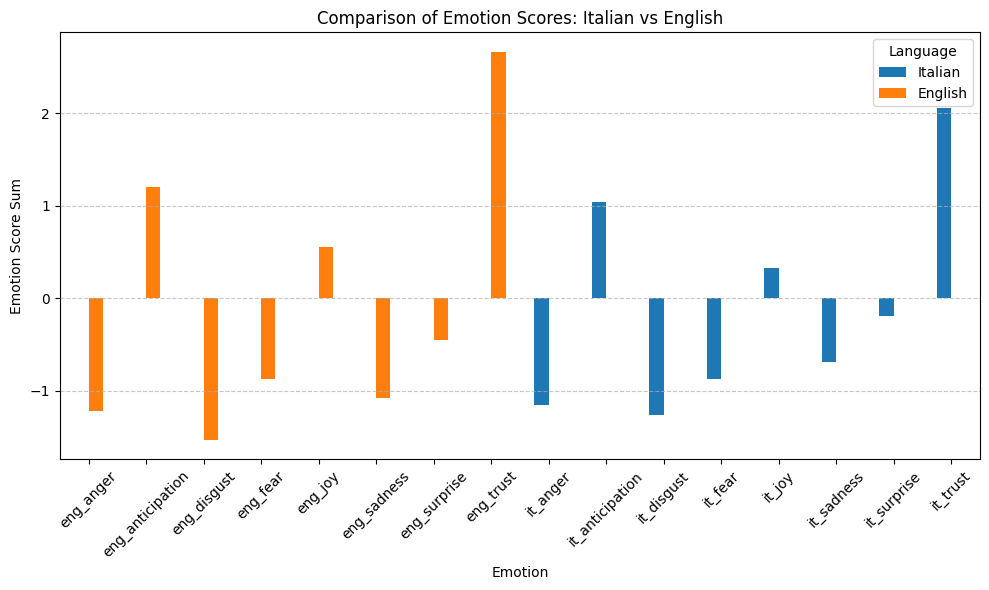

In [17]:
sum_all_emotion_scores.plot(kind='bar', figsize=(10, 6))

plt.title("Comparison of Emotion Scores: Italian vs English")
plt.ylabel("Emotion Score Sum")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Language")
plt.tight_layout()
plt.show()

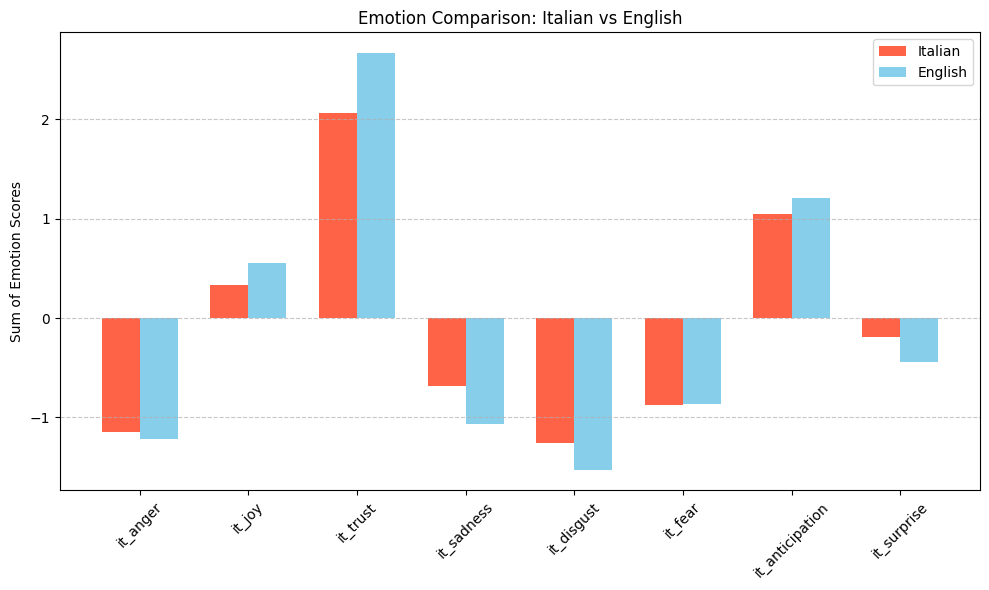

In [18]:
labels = df_it_sum.index  # emotion names
x = np.arange(len(labels))  # label locations

width = 0.35  # width of the bars

# 3. Plot
fig, ax = plt.subplots(figsize=(10, 6))  # Correct figure creation
bars1 = ax.bar(x - width/2, df_it_sum.values, width, label='Italian', color='tomato')
bars2 = ax.bar(x + width/2, df_eng_sum.values, width, label='English', color='skyblue')

# 4. Aesthetics
ax.set_ylabel('Sum of Emotion Scores')
ax.set_title('Emotion Comparison: Italian vs English')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


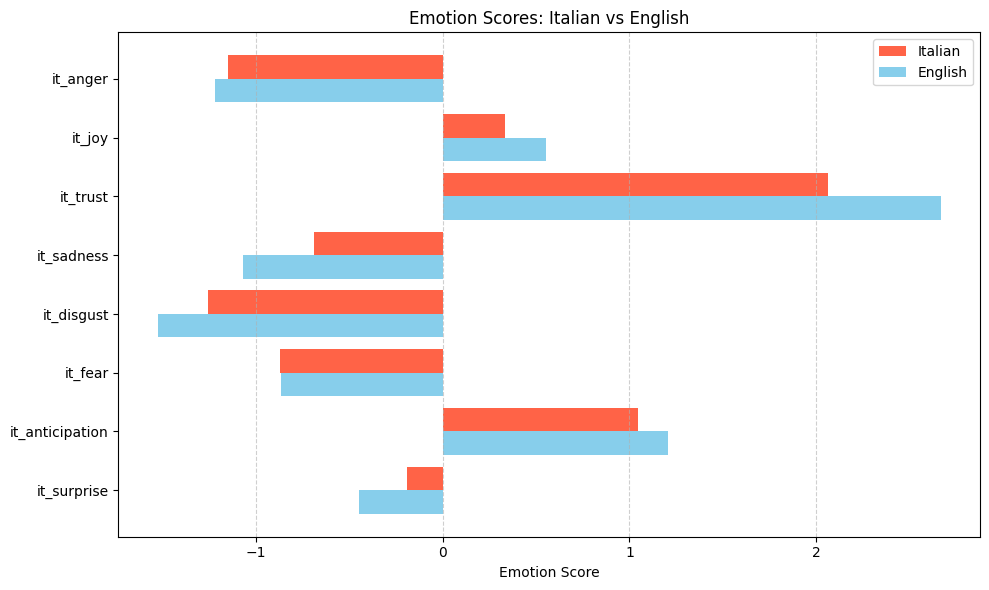

In [19]:
# Prepare data
labels = df_it_sum.index.tolist()
italian = df_it_sum.values
english = df_eng_sum.values

x = np.arange(len(labels))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(x - 0.2, italian, height=0.4, label='Italian', color='tomato')
ax.barh(x + 0.2, english, height=0.4, label='English', color='skyblue')

# Aesthetics
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # Highest values at top
ax.set_xlabel('Emotion Score')
ax.set_title('Emotion Scores: Italian vs English')
ax.legend()
ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


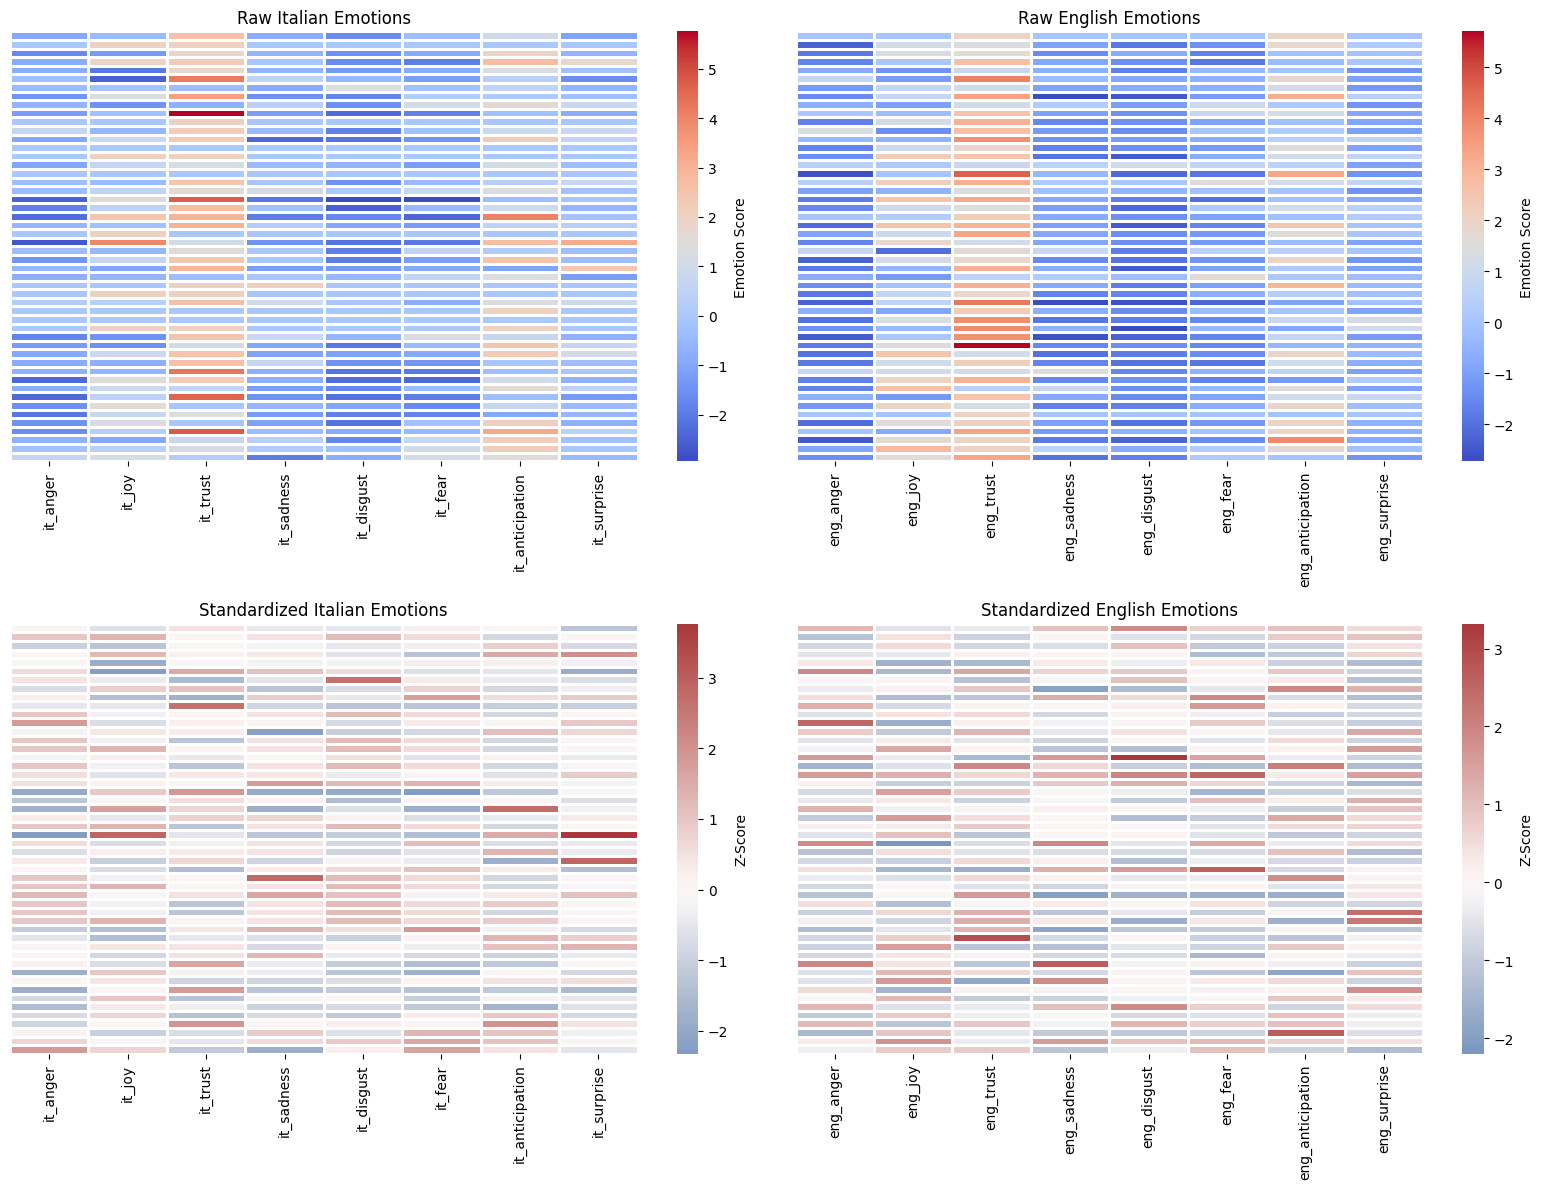

In [ ]:
#two heatmaps
#1. raw values => shows actual emotion intensity
#exloring actual values from EmoAtlas

#2. standartize values => shows relative intensity patterns
#comparing patterns 
#compare which emotions are stronger/weaker per row 


scaler = StandardScaler()

df_italian_scaled = pd.DataFrame(scaler.fit_transform(df_italian_sampled), columns=df_italian_sampled.columns)
df_english_scaled = pd.DataFrame(scaler.fit_transform(df_english_sampled), columns=df_english_sampled.columns)

# Plot raw and standardized heatmaps side by side
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Row 1: Raw values
sns.heatmap(df_italian_sampled, ax=axs[0, 0], cmap='coolwarm', linewidths=1, cbar_kws={'label': 'Emotion Score'}, yticklabels=False)
axs[0, 0].set_title("Raw Italian Emotions")

sns.heatmap(df_english_sampled, ax=axs[0, 1], cmap='coolwarm', linewidths=1, cbar_kws={'label': 'Emotion Score'}, yticklabels=False)
axs[0, 1].set_title("Raw English Emotions")

# Row 2: Standardized
sns.heatmap(df_italian_scaled, ax=axs[1, 0], cmap='vlag', center=0, linewidths=1, cbar_kws={'label': 'Z-Score'}, yticklabels=False)
axs[1, 0].set_title("Standardized Italian Emotions")

sns.heatmap(df_english_scaled, ax=axs[1, 1], cmap='vlag', center=0, linewidths=1, cbar_kws={'label': 'Z-Score'}, yticklabels=False)
axs[1, 1].set_title("Standardized English Emotions")

plt.tight_layout()
plt.show()


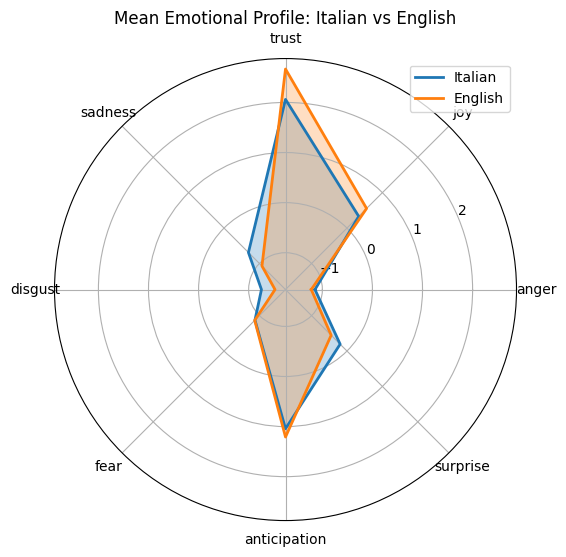

In [40]:
# Calculate mean per emotion
mean_it = df_italian.mean(axis=0).values
mean_en = df_english.mean(axis=0).values

# Close the loop for radar plot
mean_it = np.concatenate((mean_it, [mean_it[0]]))
mean_en = np.concatenate((mean_en, [mean_en[0]]))

angles = np.linspace(0, 2 * np.pi, len(df_italian.columns), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, mean_it, label='Italian', linewidth=2)
ax.plot(angles, mean_en, label='English', linewidth=2)
ax.fill(angles, mean_it, alpha=0.25)
ax.fill(angles, mean_en, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), df_italian.columns.str.replace('it_', ''))
ax.legend()
plt.title('Mean Emotional Profile: Italian vs English')
plt.show()


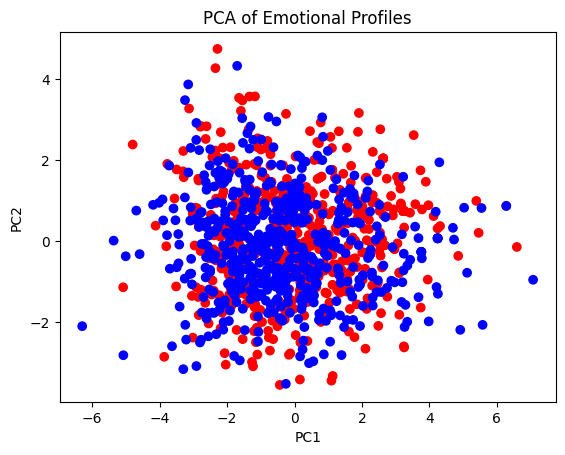

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

combined = pd.concat([df_italian.assign(language='Italian'), df_english.assign(language='English')])
pca = PCA(n_components=2)
components = pca.fit_transform(combined.drop(columns='language'))

plt.scatter(components[:, 0], components[:, 1], c=combined['language'].map({'Italian': 'red', 'English': 'blue'}))
plt.title('PCA of Emotional Profiles')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
